# 논리곱 and

In [ ]:
# 딥러닝 방정식
def f(x1, x2):
    w1 = 1
    w2 = 1
    b = -1
    z = w1 * x1 + w2 * x2 + b
    return z

# 액티베이션 펑션, 계단함수
def ac_f(z):
    if z > 0:
        return 1
    else:
        return 0

# 퍼셉트론의 구조
def 퍼셉트론(x1, x2):
    return ac_f(f(x1,x2))

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]


In [ ]:
print('[', end = "")
for x1, x2 in x:
    print(퍼셉트론(x1, x2), end = ", ")
print('\b\b]')
print(y)

[0, 0, 0, 1, ]
[0, 0, 0, 1]


# 논리합 or

In [ ]:
# 딥러닝 방정식
def f(x1, x2):
    w1 = 1
    w2 = 1
    b = -0.5
    z = w1 * x1 + w2 * x2 + b
    return z

# 액티베이션 펑션, 계단함수
def ac_f(z):
    if z > 0:
        return 1
    else:
        return 0

# 퍼셉트론의 구조
def 퍼셉트론(x1, x2):
    return ac_f(f(x1,x2))

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1]

In [ ]:
print('[', end = "")
for x1, x2 in x:
    print(퍼셉트론(x1, x2), end = ", ")
print('\b\b]')
print(y)

[0, 1, 1, 1, ]
[0, 1, 1, 1]


# 넘파이를 사용

In [ ]:
import numpy as np

# 딥러닝 방정식
def f(x1, x2):
    X = np.array([x1, x2])
    w1 = 1
    w2 = 1
    W = np.array([w1, w2])
    b = -0.5
    z = W@X + b
    return z

# 액티베이션 펑션, 계단함수
def ac_f(z):
    if z > 0:
        return 1
    else:
        return 0

# 퍼셉트론의 구조
def 퍼셉트론(x1, x2):
    return ac_f(f(x1,x2))

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1]

In [ ]:
print('[', end = "")
for x1, x2 in x:
    print(퍼셉트론(x1, x2), end = ", ")
print('\b\b]')
print(y)

[0, 1, 1, 1, ]
[0, 1, 1, 1]


# 퍼셉트론 학습

In [ ]:
from sklearn.linear_model import Perceptron
m = Perceptron()
m.fit(x, y)
print(f"""{m.predict([[0, 0]])}, {m.predict([[0, 1]])}""")

[0], [1]


가중치

In [ ]:
m.coef_

array([[2., 2.]])

바이어스

In [ ]:
m.intercept_

array([-1.])

#게이트

1. AND 게이트
2. OR 게이트
3. NOT 게이트
4. XOR 게이트

In [ ]:
def AND(x1, x2):
    X = np.array([x1, x2])
    W = np.array([2, 2])
    b = -2
    z = W@X + b
    if z > 0:
        return 1
    else:
        return 0

def OR(x1, x2):
    X = np.array([x1, x2])
    W = np.array([2, 2])
    b = -1
    z = W@X + b
    if z > 0:
        return 1
    else:
        return 0

def NOT(x):
    if x > 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NOT(AND(x1, x2))
    s2 = OR(x1, x2)
    return AND(s1, s2)

In [ ]:
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]
print('[', end = "")
for x1, x2 in x:
    print(XOR(x1, x2), end = ", ")
print('\b\b]')
print(y)

[0, 1, 1, 0, ]
[0, 1, 1, 0]


시그모이드(True, False 분류)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def derivatie(f,var):
  if var.ndim==1:#백터
    temp_var=var
    delta=1e-5
    di_val=np.zeros(var.shape)
    for idx in range(len(var)):
      t_var= float(temp_var[idx])
      temp_var[idx]=t_var+delta
      f_val_p_delta=f(temp_var)
      temp_var[idx]=t_var-delta
      f_val_m_delta=f(temp_var)
      #미분계수 (f(x+dx)-f(x-dx))/(2dx)
      di_val[idx]=(f_val_p_delta-f_val_m_delta)/(2*delta)
      temp_var[idx]=t_var
    return di_val

  elif var.ndim==2:#행렬
    temp_var=var
    delta=1e-5
    di_val=np.zeros(var.shape)

    r=var.shape[0]
    c=var.shape[1]
    for row in range(r):
      for column in range(c):
        t_var=float(temp_var[row,column])
      temp_var[row,column]=t_var+delta
      f_val_p_delta=f(temp_var)

      temp_var[row,column]=t_var-delta
      f_val_m_delta=f(temp_var)
      #미분계수 (f(x+dx)-f(x-dx))/(2dx)
      di_val[row,column]=(f_val_p_delta-f_val_m_delta)/(2*delta)
      temp_var[row,column]=t_var
    return di_val

In [ ]:
W = np.random.rand(2, 1)
b = np.random.rand(1)

In [ ]:
W.shape, b.shape

((2, 1), (1,))

In [ ]:
class LogicGate:
  def __init__(self, x_data,t_data):
    self.x_data=x_data.reshape(4,2)
    self.t_data=t_data.reshape(4,1)
    self.W = np.random.rand(2,1)
    self.b = np.random.rand(1)
    self.l_r=0.001

  #손실함수(y-t)
  def loss_f(self):
    delta=1e-7
    z=self.x_data@self.W +self.b
    y=sigmoid(z)
    return -np.sum(self.t_data*np.log(y+delta)+(1-self.t_data)*np.log((1-y)+delta))

  def train_f(self):
    f = lambda x:self.loss_f()
    print("loss_v",self.loss_f())
    for i in range(1,8001):
      self.W = self.W - self.l_r*derivatie(f,self.W)
      self.b = self.b - self.l_r*derivatie(f,self.b)
      if i%1000 ==0:
        print("횟차:",i,"loss_v:",self.loss_f())

  def predict(self,in_data):
    z=in_data@self.W +self.b
    y=sigmoid(z)
    if y>0.5:
      rs= 1
    else:
      rs= 0
    return y,rs

In [ ]:
import numpy as np
x= np.array([[0,0],[0,1],[1,0],[1,1]])
y= np.array([0,1,1,1])
AND_G=LogicGate(x,y)
AND_G.train_f()
tt_x= np.array([[0,0],[0,1],[1,0],[1,1]])

loss_v 1.5616516379321186
횟차: 1000 loss_v: 1.3342147776475144
횟차: 2000 loss_v: 1.1961600079580905
횟차: 3000 loss_v: 1.08715966093146
횟차: 4000 loss_v: 0.9958374973982624
횟차: 5000 loss_v: 0.917797184869186
횟차: 6000 loss_v: 0.8503452758737355
횟차: 7000 loss_v: 0.7915184736068834
횟차: 8000 loss_v: 0.7398078559621841


In [ ]:
for in_x in tt_x:
  py=AND_G.predict(in_x)
  print(in_x,':',py)

[0 0] : (array([0.36214164]), 0)
[0 1] : (array([0.87392018]), 1)
[1 0] : (array([0.86684131]), 1)
[1 1] : (array([0.98757411]), 1)


In [ ]:
from sklearn.datasets import load_diabetes
d = load_diabetes()

In [ ]:
y = d.target

In [ ]:
x = d.data[:, 2]

In [ ]:
n = Neuron()
n.fit(x, y)

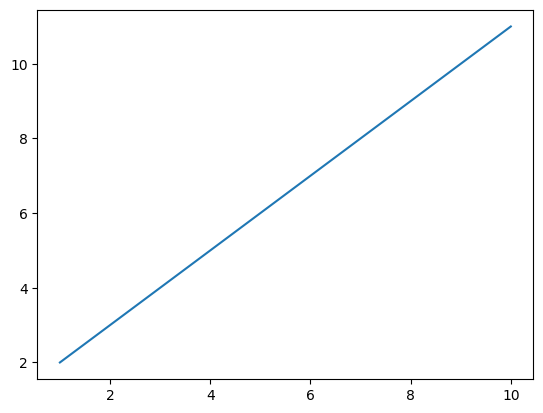

In [ ]:
import matplotlib.pyplot as plt
x1 = 1
x2 = 10
y1 = 1.0 * x1 + 1.0
y2 = 1.0 * x2 + 1.0
plt.plot([x1, x2], [y1, y2])

In [ ]:
class Neuron:
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
    def forpass(self, x):
        y = x * self.w + self.b
        return y
    def backpass(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    def fit(self, x, y, epochs = 100):
        for i in range(epochs):
            for x_in, y_in in zip(x, y):
                py = self.forpass(x_in)
                err = -(y_in - py)
                w_grad, b_grad = self.backpass(x_in, err)
                self.w -= w_grad
                self.b -= b_grad

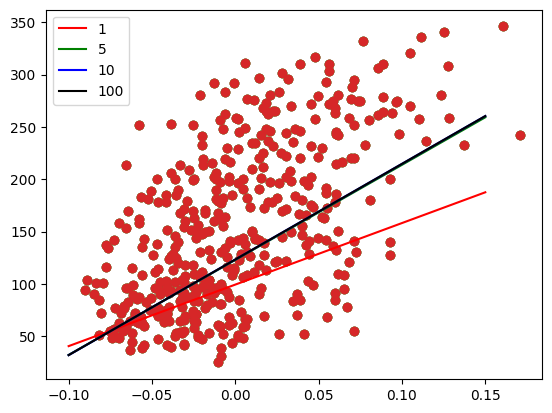

In [ ]:
n = Neuron()
n.fit(x, y, 1)
plt.scatter(x,y)
plt.plot([-0.1, 0.15], [-0.1 * n.w+n.b, 0.15*n.w+n.b], 'r', label = '1')

n = Neuron()
n.fit(x, y, 5)
plt.scatter(x,y)
plt.plot([-0.1, 0.15], [-0.1 * n.w+n.b, 0.15*n.w+n.b], 'g', label = '5')

n = Neuron()
n.fit(x, y, 10)
plt.scatter(x,y)
plt.plot([-0.1, 0.15], [-0.1 * n.w+n.b, 0.15*n.w+n.b], 'b', label = '10')

n = Neuron()
n.fit(x, y, 100)
plt.scatter(x,y)
plt.plot([-0.1, 0.15], [-0.1 * n.w+n.b, 0.15*n.w+n.b], color = '#000000', label = '100')

plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
d = load_breast_cancer()

In [ ]:
x = d.data
y = d.target

In [ ]:
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    def backpass(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0

        for i in range(epochs):
            for x_in, y_in in zip(x, y):
                z = self.forpass(x_in)
                a = self.activation(z)
                err = -(y_in - a)
                w_grad, b_grad = self.backpass(x_in, err)
                self.w -= w_grad
                self.b -= b_grad

    def predict(self, x):
        z = np.array([self.forpass(in_x) for in_x in x])
        a = self.activation(z)
        return a > 0.5

In [ ]:
x.shape, y.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split
tr_x, tt_x, tr_y, tt_y = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 42)

In [ ]:
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((398, 30), (171, 30), (398,), (171,))

In [ ]:
m = LogisticNeuron()
m.fit(tr_x, tr_y)

In [ ]:
np.mean(m.predict(tt_x) == tt_y)

0.9005847953216374